# Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir("gdrive/Shared drives/Large Scale Analytics")


In [0]:
%matplotlib inline
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, ImageColorGenerator
from nltk import FreqDist
#split Data
from sklearn.model_selection import train_test_split
#Spacy for "# Tokenization for the Clened Data"
import spacy
from tqdm import tqdm
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
#CSR Matrix
from sklearn.feature_extraction.text import TfidfVectorizer
#pickel dump
import pickle
#models
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# Pickel Dataset read

In [0]:
df_happy_moment = pd.read_pickle("./df_happy_moment_11_15.pkl")
XTrain = pd.read_pickle("./XTrain_Cleaned_hm_11_15.pkl")
XTest = pd.read_pickle("./XTest_Cleaned_hm_11_15.pkl")
yTrain = pd.read_pickle("./yTrain_prediction_11_15.pkl")
yTest = pd.read_pickle("./yTest_prediction_11_15.pkl")
cv_train = pd.read_pickle("./cv_train_CSR_Matrix_11_15.pkl")
cv_test = pd.read_pickle("./cv_test_CSR_Matrix_11_15.pkl")

In [5]:
df_happy_moment[["cleaned_hm"]]
df_happy_moment[["predicted_category"]]

,predicted_category
0,affection
1,affection
2,exercise
3,bonding
4,affection
...,...
100530,affection
100531,enjoy_the_moment
100532,affection
100533,bonding


In [6]:
# print(XTrain.head())
# print(XTest.head(1))
# print(yTrain.head(1))
# print(yTest.head(1))
# cv_train[0,1649]
# print(cv_train[0,4185])
# print(cv_train)
# print(cv_test[20103,2059])
print("XTrain shape ", XTrain.shape)
print("yTrain shape ", yTrain.shape)
print("cv_train shape ", cv_train.shape)


XTrain shape  (80428, 1)
yTrain shape  (80428,)
cv_train shape  (80428, 5000)


# Function: Plot ROC(Receiver operating characteristic) curve

In [0]:
#y_test_num = Ytest
# pred_num = cv_test , x_test
def print_roc(y_test_num, pred_num,clsType):  
  clsType = "Receiver operating characteristic: "+clsType
  fpr, tpr, thresholds = roc_curve(yTestNum, [x for x in pred_num], pos_label=1) #nb_predNum
  print("fpr",fpr)
  print("tpr",tpr)
  print("thresholds",thresholds)
  # fpr, tpr, thresholds = roc_curve(yTestNum, [x[1] for x in pred_num], pos_label=1) #nb_predNum
  roc_auc = auc(fpr, tpr)
  print('roc_auc: ', roc_auc)
  plt.plot(fpr, tpr, lw=1, alpha=0.9, label='ROC fold (AUC = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(clsType)
  plt.legend(loc="lower right")
  plt.show()

# from sklearn.metrics import roc_auc_score
# roc_auc_score(y_test,y_pred)

# def print_roc(y_test, y_pred, average="macro"):
#   lb = LabelBinarizer()
#   lb.fit(y_test)
#   roc_curve
#   y_test = lb.transform(y_test)
#   y_pred = lb.transform(y_pred)
#   fpr, tpr, thresholds = roc_curve(yTestNum, pred_num, pos_label=1)
#   return roc_auc_score(y_test, y_pred, average=average)


# Random OverSampling: ROS



In [8]:
#Train on other features
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
cv_train, yTrain = ros.fit_sample(cv_train, yTrain)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
# # np.bincount(XTrain)
# # XTrain.count_nonzero
# # yTrain.shape
# print("Before")
# print("yTrain shape ", yTrain.shape)
# print("cv_train shape ", cv_train.shape)
# print("")
# print("After")
# print("yTrain1 shape ", yTrain1.shape)
# print("cv_train1 shape ", cv_train1.shape)
# XTrain.shape

# Model: MultinomialNB

In [10]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(cv_train, yTrain)
nb_pred = clf.predict(cv_test)
print(metrics.classification_report(yTest, nb_pred))

                  precision    recall  f1-score   support

     achievement       0.48      0.38      0.42      6905
       affection       0.44      0.43      0.43      6768
         bonding       0.39      0.34      0.37      2236
enjoy_the_moment       0.14      0.26      0.18      2165
        exercise       0.01      0.01      0.01       225
         leisure       0.23      0.20      0.22      1461
          nature       0.01      0.01      0.01       347

        accuracy                           0.36     20107
       macro avg       0.24      0.23      0.23     20107
    weighted avg       0.39      0.36      0.37     20107



In [11]:
# encoder converts the labels into numbers e.g affection =1, achievement=2

nb_pred_s = pd.Series(nb_pred)
encoder = LabelEncoder()
# encoder = LabelBinarizer()

encoder.fit(yTest)
yTestNum = encoder.transform(yTest)
# nb_predNum = encoder.transform(nb_pred_s)

pred_prob = clf.predict_proba(cv_test)
# print(pred_prob)
print([x[1] for x in pred_prob])
# print(type(nb_pred_s))
# print(type(yTest))

[0.21440494877417182, 0.31895979550347925, 0.37980339248438877, 0.1367362874025685, 0.1948827425223241, 0.3863752668766238, 0.0809611727307222, 0.7787459861045791, 0.06811372224427799, 0.2722502912630006, 0.5373970141622005, 0.04288728283598913, 0.08373364868959242, 0.17265950214170064, 0.8093343371294398, 0.16776942910546208, 0.29515736613459354, 0.07041524840721344, 0.010943866378655121, 0.32007110910477066, 0.25304656155289273, 0.15501929205618362, 0.8002541714208414, 0.3081498818581731, 0.1991493119035008, 0.12349027099761062, 0.26586919084211474, 0.008014209224720521, 0.04479491117559806, 0.6926563819028784, 0.18707084006168687, 0.6400356152778927, 0.2557974783160265, 0.6667752402040127, 0.47319088383001146, 0.13316411800487699, 0.45500840727955555, 0.4717341541042281, 0.3033359280228508, 0.08196817653361797, 0.12985840924262027, 0.4118962448142562, 0.9433304380368938, 0.2924118646112712, 0.08105910962962239, 0.6330081633351975, 0.41282026318134873, 0.3741098423789761, 0.779825513

roc_auc:  0.6146177546528541


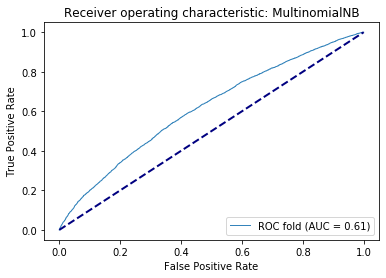

In [12]:

fpr, tpr, thresholds = roc_curve(yTestNum, [x[1] for x in pred_prob], pos_label=1) #nb_predNum

roc_auc = auc(fpr, tpr)
print('roc_auc: ', roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.9, label='ROC fold (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: MultinomialNB')
plt.legend(loc="lower right")
plt.show()

# Model: SGD

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='hinge', penalty='l2',
    alpha=1e-3, random_state=42,    max_iter=200, tol=None)

sgd.fit(cv_train, yTrain)
sgd_pred = sgd.predict(cv_test)

print(metrics.classification_report(yTest, sgd_pred))

                  precision    recall  f1-score   support

     achievement       0.40      0.55      0.46      6905
       affection       0.43      0.20      0.27      6768
         bonding       0.29      0.12      0.17      2236
enjoy_the_moment       0.15      0.13      0.14      2165
        exercise       0.00      0.00      0.00       225
         leisure       0.17      0.29      0.22      1461
          nature       0.01      0.06      0.02       347

        accuracy                           0.30     20107
       macro avg       0.21      0.19      0.18     20107
    weighted avg       0.34      0.30      0.30     20107



fpr [0.         0.06979534 0.17939876 0.21928181 0.3089437  0.36314566
 0.49351526 1.        ]
tpr [0.         0.07712766 0.21911939 0.25221631 0.35771277 0.38622931
 0.58170804 1.        ]
thresholds [7 6 5 4 3 2 1 0]
roc_auc:  0.5394811261065111


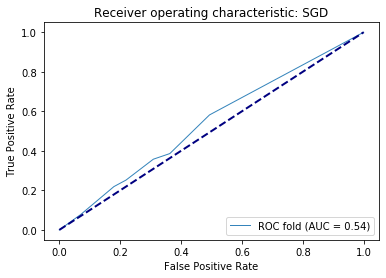

In [14]:
clsType = "SGD"
encoder = LabelEncoder()
# encoder = LabelBinarizer()
encoder.fit(yTest)
yTestNum = encoder.transform(yTest)
# encoder = LabelBinarizer()
# encoder.fit(yTest,classes = ["achievement","affection","bonding","enjoy_the_moment",""])
# yTestNum = encoder.transform(yTest)
from sklearn.metrics import roc_auc_score
sgd_predNum = encoder.transform(sgd_pred)
print_roc(yTestNum, sgd_predNum,clsType)
# print_roc(yTestNum, sgd_predNum)

In [15]:
print(type(yTestNum))
print(type(sgd_predNum))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
# print(yTestNum[1:30])
# print(sgd_predNum[1:30])

print()


# Model: SVM

In [17]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(loss='hinge', penalty='l2', class_weight='balanced', random_state=42)
linear_svm.fit(cv_train, yTrain)

svm_pred = linear_svm.predict(cv_test)
print(metrics.classification_report(yTest, svm_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


                  precision    recall  f1-score   support

     achievement       0.36      0.66      0.47      6905
       affection       0.40      0.12      0.19      6768
         bonding       0.19      0.03      0.05      2236
enjoy_the_moment       0.14      0.22      0.17      2165
        exercise       0.00      0.00      0.00       225
         leisure       0.10      0.10      0.10      1461
          nature       0.04      0.02      0.03       347

        accuracy                           0.30     20107
       macro avg       0.18      0.16      0.14     20107
    weighted avg       0.31      0.30      0.26     20107



fpr [0.         0.06979534 0.17939876 0.21928181 0.3089437  0.36314566
 0.49351526 1.        ]
tpr [0.         0.07712766 0.21911939 0.25221631 0.35771277 0.38622931
 0.58170804 1.        ]
thresholds [7 6 5 4 3 2 1 0]
roc_auc:  0.5394811261065111


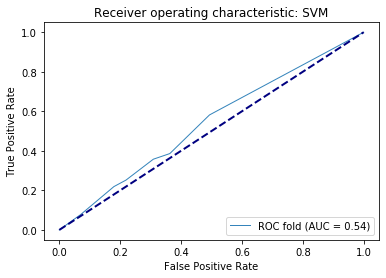

In [18]:
clsType = "SVM"
sgd_predNum = encoder.transform(sgd_pred)
print_roc(yTestNum, sgd_predNum,clsType)

# Model: XGBoost

In [19]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(cv_train , yTrain)

# make predictions for test data
xg_pred = model.predict(cv_test)

print(metrics.classification_report(yTest, xg_pred))

                  precision    recall  f1-score   support

     achievement       0.34      0.89      0.49      6905
       affection       0.31      0.03      0.05      6768
         bonding       0.08      0.00      0.01      2236
enjoy_the_moment       0.23      0.05      0.08      2165
        exercise       0.00      0.00      0.00       225
         leisure       0.07      0.02      0.03      1461
          nature       0.02      0.02      0.02       347

        accuracy                           0.32     20107
       macro avg       0.15      0.15      0.10     20107
    weighted avg       0.26      0.32      0.20     20107



fpr [0.         0.02076617 0.0392833  0.04303171 0.06582203 0.07204438
 0.10548017 1.        ]
tpr [0.         0.02349291 0.04609929 0.05023641 0.07949173 0.0837766
 0.11288416 1.        ]
thresholds [7 6 5 4 3 2 1 0]
roc_auc:  0.5040912632078176


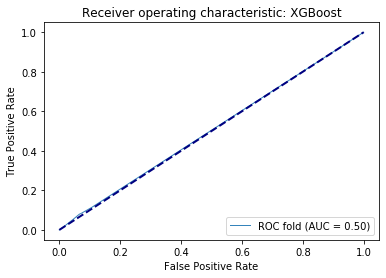

In [20]:
clsType = "XGBoost"
xg_predNum = encoder.transform(xg_pred)
print_roc(yTestNum, xg_predNum,clsType)

# Model: KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(cv_train,yTrain)
knn_predict = knn.predict(cv_test)

In [22]:
from sklearn import metrics
print(metrics.classification_report(yTest, knn_predict))

                  precision    recall  f1-score   support

     achievement       0.34      0.91      0.50      6905
       affection       0.35      0.02      0.04      6768
         bonding       0.15      0.02      0.03      2236
enjoy_the_moment       0.09      0.02      0.04      2165
        exercise       0.12      0.03      0.04       225
         leisure       0.18      0.06      0.09      1461
          nature       0.01      0.00      0.00       347

        accuracy                           0.33     20107
       macro avg       0.18      0.15      0.11     20107
    weighted avg       0.28      0.33      0.20     20107



fpr [0.         0.00314866 0.03073694 0.0341105  0.06184871 0.0762426
 0.09356024 1.        ]
tpr [0.         0.00384161 0.02423168 0.02467494 0.05171395 0.06013593
 0.0786052  1.        ]
thresholds [7 6 5 4 3 2 1 0]
roc_auc:  0.49238686811651144


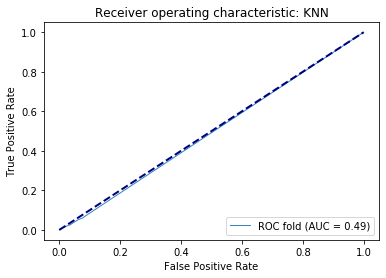

In [23]:
clsType = "KNN"
knn_predNum = encoder.transform(knn_predict)
yTestNum = encoder.transform(yTest)
print_roc(yTestNum, knn_predNum,clsType)

In [0]:
# # print(yTestNum[1:30])
# # print(knn_predNum[3:30])

# z = [x for x in knn_predict]
# z


# Model: LogisticRegression


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn import metrics
from sklearn.metrics import classification_report
logreg = Pipeline([('clf', LogisticRegression(n_jobs=1, C=1e5)),])
logreg.fit(cv_train, yTrain)

# %%time

y_pred = logreg.predict(cv_test)

print('accuracy %s' % accuracy_score(y_pred, yTest))
print(classification_report(yTest, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.31814790868851645
                  precision    recall  f1-score   support

     achievement       0.39      0.52      0.44      6905
       affection       0.41      0.29      0.34      6768
         bonding       0.22      0.13      0.16      2236
enjoy_the_moment       0.13      0.19      0.16      2165
        exercise       0.00      0.00      0.00       225
         leisure       0.12      0.12      0.12      1461
          nature       0.05      0.02      0.03       347

        accuracy                           0.32     20107
       macro avg       0.19      0.18      0.18     20107
    weighted avg       0.32      0.32      0.31     20107



fpr [0.         0.00719694 0.08066572 0.08448909 0.24514581 0.31561586
 0.52905015 1.        ]
tpr [0.         0.00694444 0.0766844  0.07830969 0.231974   0.27999409
 0.56885343 1.        ]
thresholds [7 6 5 4 3 2 1 0]
roc_auc:  0.5063693564100505


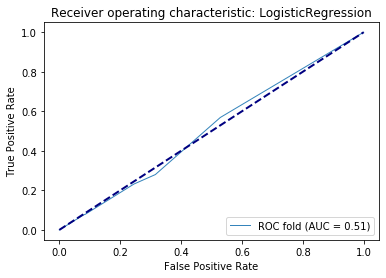

In [25]:
clsType = "LogisticRegression"
Logistic_predNum = encoder.transform(y_pred)
# yTestNum = encoder.transform(yTest)
print_roc(yTestNum, Logistic_predNum,clsType)

# temp